In [76]:
import numpy as np
import pandas as pd
import pulp
import itertools
import matplotlib.pyplot as plt

In [77]:
import pandas as pd

#現在の最大表示数
print(pd.get_option("display.max_rows"))
print(pd.get_option("display.max_columns"))

#新しく設定する最大表示数
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

500
500


## データ読み込み

In [78]:
dfschool = pd.read_csv('evaluation/fukurois_v2.csv',index_col = 0)
# The desired order
#desired_order = [28, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]#対象　いちばん初めはデマンド
desired_order = [28, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]#対象　いちばん初めはデマンド 
dfschool = dfschool.reindex(desired_order)
dfschool = dfschool.reset_index(drop=True)##学校数設定しておく
dfschool

,学校名,住所,センター,longitude,latitude,dish,class,dish_container,demand,elevation,start_time,end_time,start,end
0,中部センター,豊沢２２８９−２,中部センター,34.737693,137.964272,0,0,0,0,71.022873,0,720,0.0,12.0
1,袋井東小学校,広岡2317番地の１,中部センター,34.758102,137.945052,318,13,2,2,15.248384,630,690,10.5,11.5
2,袋井西小学校,袋井市川井442番地,中部センター,34.746236,137.916140,543,20,3,3,12.070471,630,690,10.5,11.5
3,袋井南小学校,高尾740番地,中部センター,34.742079,137.931908,641,22,3,3,25.327871,630,690,10.5,11.5
4,袋井北小学校,久能1580番地,中部センター,34.759207,137.914826,"1,079",34,6,6,14.273340,630,690,10.5,11.5
5,高南小学校,上田町306番地の２,中部センター,34.734721,137.934382,441,15,3,3,12.849963,630,690,10.5,11.5
6,浅羽東小学校,浅羽2800番地,中部センター,34.721179,137.927260,387,13,3,2,17.661812,630,690,10.5,11.5
7,袋井中学校,川井701番地,中部センター,34.745832,137.918893,860,30,4,4,11.627437,630,700,10.5,11.7
8,袋井南中学校,愛野3110番地,中部センター,34.742036,137.942423,522,16,3,3,30.801228,630,700,10.5,11.7
9,袋井東幼稚園,国本2288番地,中部センター,34.760808,137.937936,69,3,0,1,14.773001,630,660,10.5,11.0


In [79]:
dfvehicle = pd.read_csv('evaluation/中部給食センター_車両.csv', index_col = 0)
dfvehicle 

,name,container,t,memo
1,1いすずエルフ,6,３ｔ,パワーゲート付
2,2いすずエルフ,6,３ｔ,パワーゲート付
3,3いすずエルフ,6,３ｔ,パワーゲート付
4,4いすずエルフ,6,３ｔ,パワーゲート付
5,5いすずエルフ,4,２ｔ,NaN
6,6いすずエルフ,4,２ｔ,NaN
7,7いすずエルフ,4,２ｔ,NaN
8,8トヨタ,6,３ｔ,NaN
9,9日野デュトロ,6,２ｔ,NaN


In [80]:
#距離
df_distance = pd.read_csv('csv/distance_matrix.csv', header=None)
# Reorder the matrix
distance = df_distance.iloc[desired_order, desired_order].values.tolist()
distance

[[0.0,
  4.188,
  5.846,
  3.952,
  6.655,
  3.566,
  4.975,
  5.677,
  3.359,
  5.669,
  5.713,
  6.382,
  4.794,
  6.993,
  8.114,
  5.636,
  5.111],
 [4.188,
  0.0,
  3.178,
  3.695,
  3.211,
  3.738,
  5.622,
  3.263,
  2.429,
  1.254,
  3.456,
  7.731,
  5.441,
  8.448,
  10.151,
  7.473,
  9.009],
 [5.553,
  3.178,
  0.0,
  2.023,
  2.18,
  2.856,
  4.589,
  0.477,
  3.29,
  2.92,
  0.133,
  2.609,
  4.676,
  5.37,
  9.325,
  5.265,
  8.626],
 [3.952,
  3.694,
  2.022,
  0.0,
  3.124,
  1.782,
  3.78,
  1.853,
  1.688,
  3.298,
  1.889,
  3.429,
  3.599,
  6.064,
  8.309,
  5.338,
  7.167],
 [7.667,
  3.485,
  2.181,
  3.136,
  0.0,
  4.703,
  6.436,
  2.263,
  4.303,
  2.533,
  2.456,
  5.125,
  6.523,
  7.575,
  10.125,
  7.008,
  10.883],
 [3.566,
  3.738,
  2.856,
  1.782,
  4.486,
  0.0,
  2.784,
  2.687,
  1.304,
  3.614,
  2.723,
  3.742,
  2.603,
  5.388,
  7.313,
  4.69,
  6.452],
 [4.937,
  5.622,
  4.577,
  3.78,
  6.423,
  2.784,
  0.0,
  4.408,
  3.188,
  5.498,
  4.

In [81]:
#移動時間
df_duration = pd.read_csv('csv/duration_matrix.csv', header=None)
# Reorder the matrix
duration = df_duration.iloc[desired_order, desired_order].values.tolist()
duration

[[0.0,
  7.6,
  11.6,
  7.316666666666666,
  15.066666666666666,
  6.483333333333333,
  8.016666666666667,
  11.1,
  5.316666666666666,
  11.3,
  11.05,
  11.366666666666667,
  7.233333333333333,
  10.833333333333334,
  12.283333333333331,
  8.733333333333333,
  9.0],
 [7.766666666666667,
  0.0,
  7.15,
  8.283333333333333,
  6.366666666666666,
  7.55,
  10.8,
  7.2,
  4.35,
  3.85,
  7.383333333333334,
  9.95,
  10.016666666666667,
  15.666666666666666,
  18.25,
  14.333333333333334,
  15.933333333333334],
 [11.566666666666666,
  7.366666666666666,
  0.0,
  6.75,
  7.333333333333333,
  8.133333333333333,
  10.033333333333331,
  1.9166666666666667,
  8.5,
  7.7,
  0.5,
  5.333333333333333,
  9.85,
  9.95,
  15.783333333333331,
  10.35,
  17.733333333333334],
 [7.333333333333333,
  8.616666666666667,
  6.85,
  0.0,
  10.25,
  5.3,
  8.7,
  6.35,
  4.283333333333333,
  9.116666666666667,
  6.3,
  8.0,
  7.916666666666667,
  12.133333333333333,
  16.166666666666668,
  11.3,
  13.716666666

In [82]:
# サービス時間
service_time = 5  # 分

In [83]:
# Customer count ('0' is depot) 
customer_count = len(dfschool)
# The number of vehicle
vehicle_count = len(dfvehicle)
# The capacity of vehicle
vehicle_capacity = list(dfvehicle['container'])

In [84]:
customer_count

17

## 最適化(距離最小化)

In [85]:
def display_route(vehicle_count, x, t, dfschool, service_time):
    output = []
    vehicleresult = []
    
    for k in range(vehicle_count):
        #route = ["Vehicle {}".format(k+1)]
        i = 0  # Start from depot
        v = [0 , 0, 0, 0, [0]]#おとづれた場所、時間、距離、積載量
        while True:
            found = False
            for j in range(customer_count):
                if i != j and pulp.value(x[i][j][k]) == 1:
                    v[0] += 1
                    v[1] += duration[i][j]
                    v[2] += distance[i][j]
                    v[3] += list(dfschool['demand'])[j]
                    v[4].append(j) 
                    arrival_time = pulp.value(t[j])
                    if i == 0:#出発時刻追加
                        route = ["Vehicle {}( Departure: {:.2f} min)".format(k+1, arrival_time-duration[0][j])]
                    departure_time = arrival_time + service_time
                    route_details = "-> {} min -> Customer {} (Arrival: {:.2f} min, Departure: {:.2f} min)".format(
                        int(duration[i][j]), j, arrival_time, departure_time)
                    route.append(route_details)
                    i = j  # Move to the next customer
                    found = True
                    if j == 0:
                        break
            if not found or i == 0:
                break
        route.append("-> Depot")
        output.append(' '.join(route))
        vehicleresult.append(v)
    
    return output, vehicleresult

# Once the VRP code is run, we can call this function as:
# routes_output_with_departure = display_route_with_departure(vehicle_count, x, t, dfschool, service_time)
# routes_output_with_departure

In [86]:
def solve_cvrp(vehicle_count, customer_count, distance, duration, service_time, dfschool, vehicle_capacity, name, threadnum):
    """
    model = pulp.LpProblem("CVRP", pulp.LpMinimize)
    
    # 意思決定変数の定義
    x = pulp.LpVariable.dicts("x", 
                              (range(customer_count), 
                               range(customer_count), 
                               range(vehicle_count)), 
                              cat='Binary')
    
    # 目的関数
    model += pulp.lpSum(distance[i][j] * x[i][j][k] 
                        for i in range(customer_count) 
                        for j in range(customer_count) 
                        for k in range(vehicle_count))
    
    # 制約の追加
    for j in range(1, customer_count):
        model += pulp.lpSum(x[i][j][k] for i in range(customer_count) for k in range(vehicle_count)) == 1 

    for k in range(vehicle_count):
        model += pulp.lpSum(x[0][j][k] for j in range(1, customer_count)) == 1
        model += pulp.lpSum(x[i][0][k] for i in range(1, customer_count)) == 1

    for k in range(vehicle_count):
        model += pulp.lpSum(dfschool.demand[j] * x[i][j][k] for i in range(customer_count) for j in range(1, customer_count)) <= vehicle_capacity[k]
    
    model.solve(pulp.PULP_CBC_CMD(threads=threadnum))
    
    model = model
    x = x
    result_vehicle, result_distance, routes_output, vehicleresult = 0,0,0,0
    return result_vehicle, result_distance, routes_output, vehicleresult, x

    """
    # Solve with pulp
    # Definition of LpProblem instance
    problem = pulp.LpProblem("CVRP", pulp.LpMinimize)

    #x：10のバイナリ　　配送対象かどうか
    x = [[[pulp.LpVariable("x%s_%s,%s"%(i,j,k), cat="Binary") if i != j else None for k in range(vehicle_count)]for j in range(customer_count)] for i in range(customer_count)]

    t = [pulp.LpVariable("t%s"%(i), lowBound=0, cat="Continuous") for i in range(customer_count)]

    #目的関数　距離の最小化
    problem += pulp.lpSum(distance[i][j] * x[i][j][k] if i != j else 0
                        for k in range(vehicle_count) 
                        for j in range(customer_count) 
                        for i in range (customer_count))

    # Constraints
    #必ず1回、客をおとづれる
    for j in range(1, customer_count):
        problem += pulp.lpSum(x[i][j][k] if i != j else 0 
                            for i in range(customer_count) 
                            for k in range(vehicle_count)) == 1 
        
    #デポ発信デポ到着
    for k in range(vehicle_count):
        problem += pulp.lpSum(x[0][j][k] for j in range(1,customer_count)) == 1
        problem += pulp.lpSum(x[i][0][k] for i in range(1,customer_count)) == 1

    
    for k in range(vehicle_count):
        for j in range(customer_count):
            problem += pulp.lpSum(x[i][j][k] if i != j else 0 
                                for i in range(customer_count)) -  pulp.lpSum(x[j][i][k] for i in range(customer_count)) == 0
    
    for k in range(vehicle_count):
        problem += pulp.lpSum(dfschool.demand[j] * x[i][j][k] if i != j else 0 for i in range(customer_count) for j in range (1,customer_count)) <= vehicle_capacity[k] 

    
    # Time window constraints and service time
    for i in range(customer_count):
        for j in range(1, customer_count):
            for k in range(vehicle_count):
                if i != j:
                    problem += t[i] + duration[i][j] + service_time - t[j] <= (1 - x[i][j][k]) * 999999  # 999999 is a big number to linearize the constraints
                    problem += t[j] >= dfschool.start_time[j]
                    problem += t[j] <= dfschool.end_time[j] - service_time
                    
    # MTZ制約に必要な訪問順序変数uを定義します
    u = {}
    for i in range(1, customer_count):
        u[i] = pulp.LpVariable(f'u_{i}', lowBound=1, upBound=customer_count - 1, cat='Continuous')

    # MTZ制約を追加します
    for k in range(vehicle_count):
        for i in range(1, customer_count):
            for j in range(1, customer_count):
                if i != j:
                    problem += u[i] - u[j] + customer_count * x[i][j][k] <= customer_count - 1
    """
    # Subtour constraints
    subtours = []
    for i in range(2,customer_count):
        subtours += itertools.combinations(range(1,customer_count), i)

    for s in subtours:
        problem += pulp.lpSum(x[i][j][k] if i !=j else 0 for i, j in itertools.permutations(s,2) for k in range(vehicle_count)) <= len(s) - 1
    """
    # Print vehicle_count which needed for solving problem
    # Print calculated minimum distance value
    result_vehicle, result_distance, routes_output, vehicleresult = 0, 0, 0, 0
    if problem.solve(pulp.PULP_CBC_CMD(threads=threadnum)) == 1:
        result_vehicle = vehicle_count
        result_distance = pulp.value(problem.objective)
        routes_output, vehicleresult = display_route(vehicle_count, x, t, dfschool, service_time)
        #break
    

    return result_vehicle, result_distance, routes_output, vehicleresult, x
    


In [87]:
def plotgraph(dfschool, name, vehicle_count, customer_count, x):
    # Visualization: plotting with matplotlib
    plt.figure(figsize=(8,8))
    for i in range(customer_count):    
        if i == 0:
            #plt.scatter(dfschool.longitude[i], dfschool.latitude[i], c='green', s=200)
            plt.scatter(dfschool['longitude'][i], dfschool['latitude'][i], c='green', s=200)
            #plt.text(dfschool.longitude[i], dfschool.latitude[i], "depot", fontsize=12)
            plt.text(dfschool['longitude'][i], dfschool['latitude'][i], "depot", fontsize=12)
        else:
            #plt.scatter(dfschool.longitude[i], dfschool.latitude[i], c='orange', s=200)
            plt.scatter(dfschool['longitude'][i], dfschool['latitude'][i], c='orange', s=200)
            #plt.text(dfschool.longitude[i], dfschool.latitude[i], str(dfschool.demand[i]), fontsize=12)
            plt.text(dfschool['longitude'][i], dfschool['latitude'][i], str(dfschool.demand[i]), fontsize=12)

    for k in range(vehicle_count):
        for i in range(customer_count):
            for j in range(customer_count):
                if i != j and pulp.value(x[i][j][k]) == 1:
                    #plt.plot([dfschool.longitude[i], dfschool.longitude[j]], [dfschool.latitude[i], dfschool.latitude[j]], c="black")
                    plt.plot([dfschool['longitude'][i], dfschool['longitude'][j]], [dfschool['latitude'][i], dfschool['latitude'][j]], c="black")
                    plt.savefig('evaluation_result/{}_{}_{}.png'.format(name, vehicle_count, customer_count))

    plt.title("Vehicles Routing Result")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/haruharukaka/.pyenv/versions/3.8.5/lib/python3.8/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/7g/qysd_9w90fzdq95qwxxv2zrh0000gp/T/1027ccfbfeea4d61942f5fc4b3ad9b19-pulp.mps threads 8 timeMode elapsed branch printingOptions all solution /var/folders/7g/qysd_9w90fzdq95qwxxv2zrh0000gp/T/1027ccfbfeea4d61942f5fc4b3ad9b19-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 9273 COLUMNS
At line 44410 RHS
At line 53679 BOUNDS
At line 56160 ENDATA
Problem MODEL has 9268 rows, 2481 columns and 27792 elements
Coin0008I MODEL read with 0 errors
threads was changed from 0 to 8
Option for timeMode changed from cpu to elapsed
Continuous objective value is 98.342 - 0.02 seconds
Cgl0003I 6 fixed, 0 tightened bounds, 3330 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 300 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bound

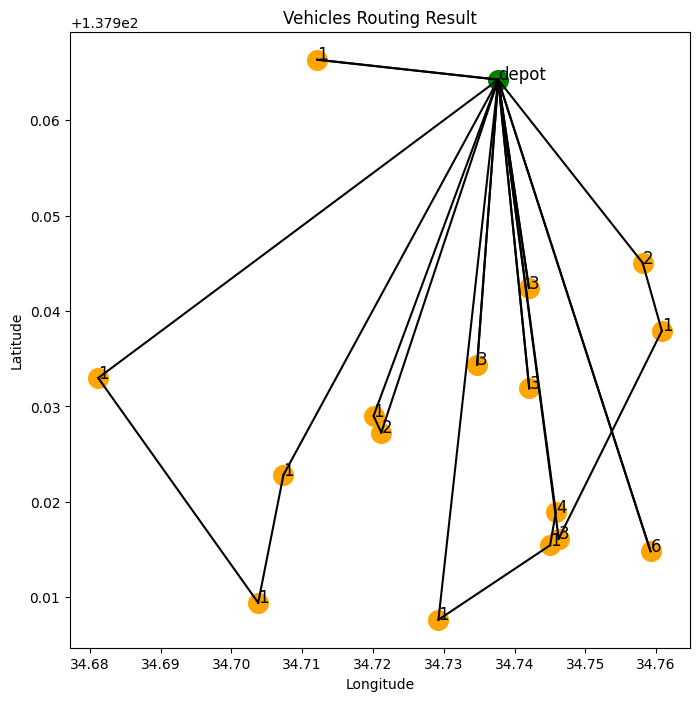

In [88]:
import time


result = []
name = 'v2'#v1はサブツアー制約
threadnum = 8

# Solve with pulp
for _vehicle_count in reversed(range(vehicle_count, vehicle_count+1)):  #reversed(range(1, vehicle_count+1)):  
    # 実行時刻を記録
    start_time = time.time()

    result_vehicle, result_distance, routes_output, vehicleresult, x = solve_cvrp(_vehicle_count, customer_count, distance, duration, service_time, dfschool, vehicle_capacity, name, threadnum)
    
    # 終了時刻を記録
    end_time = time.time()

    # 経過時間を計算して表示
    execution_time = end_time - start_time
    print(f"プログラムの実行時間: {execution_time}秒")

    plotgraph(dfschool, name, _vehicle_count, customer_count, x)
    result.append([_vehicle_count, customer_count, threadnum, result_distance, routes_output, vehicleresult, execution_time])

In [89]:
df_result = pd.DataFrame(result, columns=['vehicle_count', 'customer_count', 'threadnum', 'result_distance', 'routes_output','vehicleresult', 'execution_time'])
df_result.to_csv('evaluation_result/{}_{}_threadnum{}.csv'.format(name, customer_count,threadnum))

In [90]:
"""
# Solve with pulp
for vehicle_count in range(1, vehicle_count+1):    
    # Definition of LpProblem instance
    problem = pulp.LpProblem("CVRP", pulp.LpMinimize)
    
    #x：10のバイナリ　　配送対象かどうか
    x = [[[pulp.LpVariable("x%s_%s,%s"%(i,j,k), cat="Binary") if i != j else None for k in range(vehicle_count)]for j in range(customer_count)] for i in range(customer_count)]
    
    t = [pulp.LpVariable("t%s"%(i), lowBound=0, cat="Continuous") for i in range(customer_count)]
    
    #目的関数　距離の最小化
    problem += pulp.lpSum(distance[i][j] * x[i][j][k] if i != j else 0
                          for k in range(vehicle_count) 
                          for j in range(customer_count) 
                          for i in range (customer_count))

    # Constraints
    #必ず1回、客をおとづれる
    for j in range(1, customer_count):
        problem += pulp.lpSum(x[i][j][k] if i != j else 0 
                              for i in range(customer_count) 
                              for k in range(vehicle_count)) == 1 
        
    #デポ発信デポ到着
    for k in range(vehicle_count):
        problem += pulp.lpSum(x[0][j][k] for j in range(1,customer_count)) == 1
        problem += pulp.lpSum(x[i][0][k] for i in range(1,customer_count)) == 1

    for k in range(vehicle_count):
        for j in range(customer_count):
            problem += pulp.lpSum(x[i][j][k] if i != j else 0 
                                  for i in range(customer_count)) -  pulp.lpSum(x[j][i][k] for i in range(customer_count)) == 0

    for k in range(vehicle_count):
        problem += pulp.lpSum(dfschool.demand[j] * x[i][j][k] if i != j else 0 for i in range(customer_count) for j in range (1,customer_count)) <= vehicle_capacity[k] 
    
    
    # Time window constraints and service time
    for i in range(customer_count):
        for j in range(1, customer_count):
            for k in range(vehicle_count):
                if i != j:
                    problem += t[i] + duration[i][j] + service_time - t[j] <= (1 - x[i][j][k]) * 999999  # 999999 is a big number to linearize the constraints
                    problem += t[j] >= dfschool.start_time[j]
                    problem += t[j] <= dfschool.end_time[j] - service_time
                    
    
    # Subtour constraints
    subtours = []
    for i in range(2,customer_count):
         subtours += itertools.combinations(range(1,customer_count), i)

    for s in subtours:
        problem += pulp.lpSum(x[i][j][k] if i !=j else 0 for i, j in itertools.permutations(s,2) for k in range(vehicle_count)) <= len(s) - 1

    # Print vehicle_count which needed for solving problem
    # Print calculated minimum distance value
    if problem.solve() == 1:
        result_vehicle = vehicle_count
        result_distance = pulp.value(problem.objective)
        routes_output, vehicleresult = display_route(vehicle_count, x, t, dfschool, service_time)
        result.append([vehicle_count, result_distance, routes_output, vehicleresult])
        print(vehicle_count, result_distance, routes_output, vehicleresult)
        #break

# Visualization: plotting with matplotlib
plt.figure(figsize=(8,8))
for i in range(customer_count):    
    if i == 0:
        plt.scatter(dfschool.longitude[i], dfschool.latitude[i], c='green', s=200)
        plt.text(dfschool.longitude[i], dfschool.latitude[i], "depot", fontsize=12)
    else:
        plt.scatter(dfschool.longitude[i], dfschool.latitude[i], c='orange', s=200)
        plt.text(dfschool.longitude[i], dfschool.latitude[i], str(dfschool.demand[i]), fontsize=12)

for k in range(vehicle_count):
    for i in range(customer_count):
        for j in range(customer_count):
            if i != j and pulp.value(x[i][j][k]) == 1:
                plt.plot([dfschool.longitude[i], dfschool.longitude[j]], [dfschool.latitude[i], dfschool.latitude[j]], c="black")

plt.title("Vehicles Routing Result")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

print(result_vehicle, result_distance)

# 終了時刻を記録
end_time = time.time()

# 経過時間を計算して表示
execution_time = end_time - start_time
print(f"プログラムの実行時間: {execution_time}秒")


pd.DataFrame(result, columns=['vehicle_count', 'result_distance', 'routes_output','vehicleresult'])
"""

'\n# Solve with pulp\nfor vehicle_count in range(1, vehicle_count+1):    \n    # Definition of LpProblem instance\n    problem = pulp.LpProblem("CVRP", pulp.LpMinimize)\n    \n    #x：10のバイナリ\u3000\u3000配送対象かどうか\n    x = [[[pulp.LpVariable("x%s_%s,%s"%(i,j,k), cat="Binary") if i != j else None for k in range(vehicle_count)]for j in range(customer_count)] for i in range(customer_count)]\n    \n    t = [pulp.LpVariable("t%s"%(i), lowBound=0, cat="Continuous") for i in range(customer_count)]\n    \n    #目的関数\u3000距離の最小化\n    problem += pulp.lpSum(distance[i][j] * x[i][j][k] if i != j else 0\n                          for k in range(vehicle_count) \n                          for j in range(customer_count) \n                          for i in range (customer_count))\n\n    # Constraints\n    #必ず1回、客をおとづれる\n    for j in range(1, customer_count):\n        problem += pulp.lpSum(x[i][j][k] if i != j else 0 \n                              for i in range(customer_count) \n                         